In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
              'python-machine-learning-book-2nd-edition'
              '/master/code/ch10/housing.data.txt',
              sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


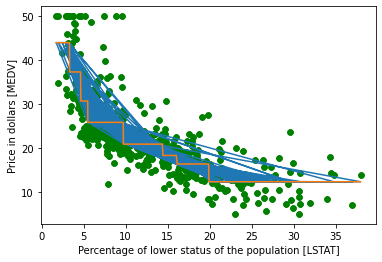

In [11]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
X=df[['LSTAT']].values
Y=df[['MEDV']].values
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X,Y)

def lin_regplot(X,Y,model):
    plt.scatter(X,Y,c='green',s=30)
    plt.plot(X,model.predict(X))
    return None

lin_regplot(X,Y,tree)
sort_idx=X.flatten().argsort()
lin_regplot(X[sort_idx],Y[sort_idx],tree)
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in dollars [MEDV]')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
Y=df['MEDV'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(n_estimators=1000,criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train,Y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(Y_train,y_train_pred),
                                    mean_squared_error(Y_test,y_test_pred)))

print('R^2 train: %.3f, test: %.3f'%(r2_score(Y_train,y_train_pred),
                                    r2_score(Y_test,y_test_pred)))

MSE train: 1.689, test: 10.299
R^2 train: 0.978, test: 0.901


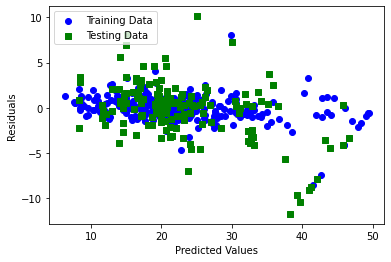

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_train_pred,y_train_pred-Y_train,c='blue',marker='o',label="Training Data")

plt.scatter(y_test_pred,y_test_pred-Y_test,c='green',marker='s',label="Testing Data")

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()